In [17]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


results = pd.read_csv("results.csv")

In [20]:
def graph_convergens(items):
    # Create a copy to avoid modifying the original dataframe
    items_to_plot = items.copy()
    
    # Parse the fitness_over_gen column safely
    def parse_fitness(x):
        try:
            if isinstance(x, str):
                return [float(v) for v in ast.literal_eval(x)]
            elif isinstance(x, list):
                return [float(v) for v in x]
            else:
                return []
        except:
            print(f"Warning: Could not parse fitness data: {x}")
            return []
    
    items_to_plot['fitness_over_gen'] = items_to_plot['fitness_over_gen'].apply(parse_fitness)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    for idx, row in items_to_plot.iterrows():
        fitness_data = row['fitness_over_gen']
        if fitness_data:  # Only plot if data exists
            generations = range(len(fitness_data))
            # Use seed column if it exists, otherwise use index
            if 'seed' in row:
                label = f"Seed {row['seed']}"
            elif 'Unnamed: 0' in row:
                label = f"Seed {row['Unnamed: 0']}"
            else:
                label = f"Run {idx}"
            
            plt.plot(generations, fitness_data, label=label, linewidth=2)
    
    plt.xlabel("Generation")
    plt.ylabel("Mean of 3 Best Fitness (MSE)")
    plt.title("Convergence Curves for Symbolic Regression")
    plt.legend(title="Seeds")
    plt.grid(True, alpha=0.3)
    plt.show()


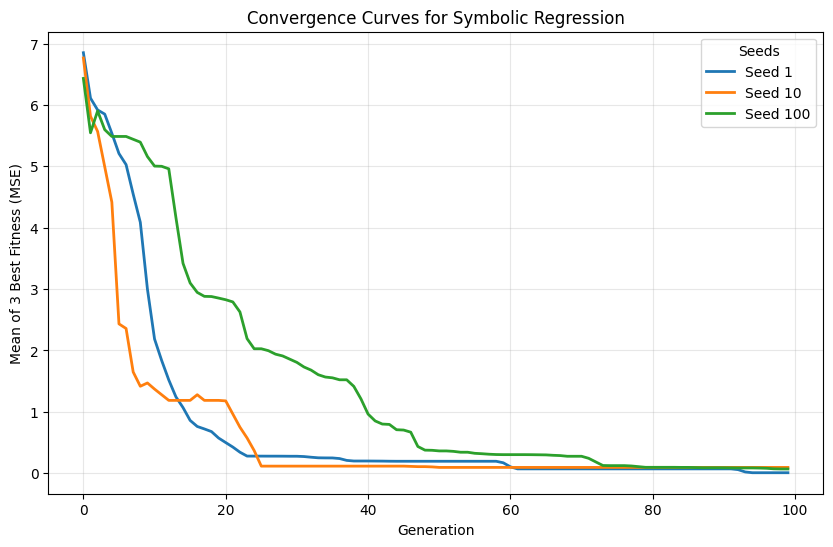

In [21]:
graph_convergens(results)

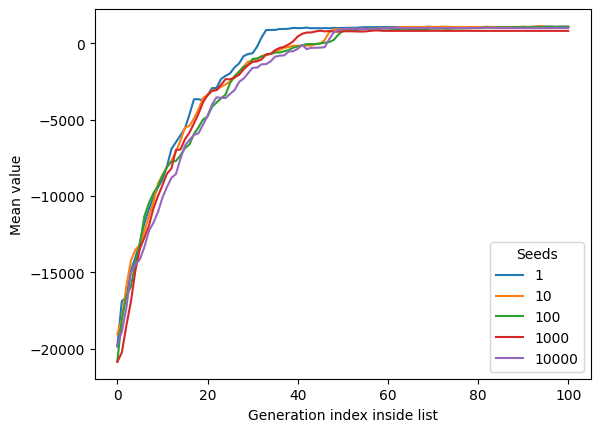

In [10]:
graph_convergens(items_995)

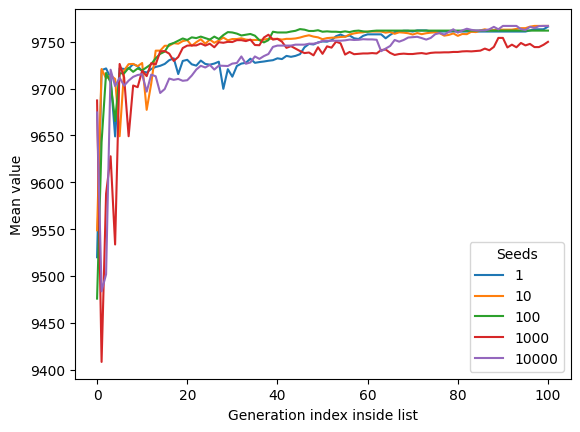

In [11]:
graph_convergens(items_10000)